In [2]:
from bs4 import BeautifulSoup
import requests
import re

def fetch_html_tables(url):
    "Returns a list of tables in the html of url"
    page = requests.get(url)
    bs=BeautifulSoup(page.content)
    tables=bs.find_all('table')
    return tables

tables=fetch_html_tables('https://www.worldometers.info/coronavirus/')
table_html=tables[0]

#printing top
print(str(table_html)[:1000])

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width

In [3]:
def html_to_table(html):
    "Returns the table defined in html as a list"
    #defining the table:
    table=[]
    #iterating over all rows
    for row in html.find_all('tr'):
        r=[]
        #finding all cells in each row:
        cells=row.find_all('td')
        
        #if no cells are found, look for headings
        if len(cells)==0:
            cells=row.find_all('th')
            
        #iterate over cells:
        for cell in cells:
            cell=format(cell)
            r.append(cell)
        
        #append the row to t:
        table.append(r)
    return table

def format(cell):
    "Returns a string after converting bs4 object cell to clean text"
    if cell.content is None:
        s=cell.text
    elif len(cell.content)==0:
        return ''
    else:
        s=' '.join([str(c) for c in cell.content])
        
    #here you can add additional characters/strings you want to 
    #remove, change punctuations or format the string in other
    #ways:
    s=s.replace('\xa0','')
    s=s.replace('\n','')
    return s

table=html_to_table(table_html)

#printing top
print(str(table)[:1000])

[['#', 'Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases', 'Serious,Critical', 'TotCases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/1M pop', 'Population', 'Continent', '1 Caseevery X ppl', '1 Deathevery X ppl', '1 Testevery X ppl', 'New Cases/1M pop', 'New Deaths/1M pop', 'Active Cases/1M pop'], ['', 'North America', '96,522,954', '+2,766', '1,441,739', '+103', '78,190,198', '+2,483', '16,891,017', '7,692', '', '', '', '', '', 'North America', '', '', '', '', '', ''], ['', 'Asia', '139,348,783', '+414,868', '1,401,720', '+834', '120,098,287', '+85,263', '17,848,776', '27,002', '', '', '', '', '', 'Asia', '', '', '', '', '', ''], ['', 'South America', '56,085,537', '+205', '1,287,609', '', '51,594,100', '+1,761', '3,203,828', '11,601', '', '', '', '', '', 'South America', '', '', '', '', '', ''], ['', 'Europe', '178,121,366', '+98,275', '1,770,685', '+673', '156,932,461', '+393,678', '19,418,220', '10,616', '', '', 

In [4]:
';'.join(table[0])

'#;Country,Other;TotalCases;NewCases;TotalDeaths;NewDeaths;TotalRecovered;NewRecovered;ActiveCases;Serious,Critical;TotCases/1M pop;Deaths/1M pop;TotalTests;Tests/1M pop;Population;Continent;1 Caseevery X ppl;1 Deathevery X ppl;1 Testevery X ppl;New Cases/1M pop;New Deaths/1M pop;Active Cases/1M pop'

In [5]:
def save_data(file_name,table):
    "Saves table to file_name"
    f=open(file_name,'w')
    for row in table:
        f.write(';'.join(row)+'\n')
    f.close()
    
save_data('test.csv',table)

In [6]:
import pandas as pd
pd.read_csv('test.csv', delimiter=';', encoding='latin1')
save_data('test.csv',table)
pd.read_csv('test.csv', delimiter=';', encoding='latin1')

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,TotalTests,Tests/1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,NaN,North America,"96,522,954","+2,766","1,441,739",+103,"78,190,198","+2,483","16,891,017","7,692",...,NaN,NaN,NaN,North America,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Asia,"139,348,783","+414,868","1,401,720",+834,"120,098,287","+85,263","17,848,776","27,002",...,NaN,NaN,NaN,Asia,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,South America,"56,085,537",+205,"1,287,609",NaN,"51,594,100","+1,761","3,203,828","11,601",...,NaN,NaN,NaN,South America,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Europe,"178,121,366","+98,275","1,770,685",+673,"156,932,461","+393,678","19,418,220","10,616",...,NaN,NaN,NaN,Europe,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Oceania,"5,444,598","+75,928","8,892",+54,"4,741,943","+18,669","693,763",128,...,NaN,NaN,NaN,Australia/Oceania,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,NaN,Total:,"178,121,366","+98,275","1,770,685",+673,"156,932,461","+393,678","19,418,220","10,616",...,NaN,NaN,NaN,Europe,,NaN,NaN,NaN,NaN,NaN
239,NaN,Total:,"5,444,598","+75,928","8,892",+54,"4,741,943","+18,669","693,763",128,...,NaN,NaN,NaN,Australia/Oceania,,NaN,NaN,NaN,NaN,NaN
240,NaN,Total:,"11,756,153",+252,"252,811",+2,"10,975,417",+393,"527,925","1,343",...,NaN,NaN,NaN,Africa,,NaN,NaN,NaN,NaN,NaN
241,NaN,Total:,721,NaN,15,NaN,706,NaN,0,0,...,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN


In [7]:
from pandas.core.apply import frame_apply
df1 = pd.read_csv('test.csv', delimiter=';')
df1

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,TotalTests,Tests/1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,NaN,North America,"96,522,954","+2,766","1,441,739",+103,"78,190,198","+2,483","16,891,017","7,692",...,NaN,NaN,NaN,North America,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Asia,"139,348,783","+414,868","1,401,720",+834,"120,098,287","+85,263","17,848,776","27,002",...,NaN,NaN,NaN,Asia,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,South America,"56,085,537",+205,"1,287,609",NaN,"51,594,100","+1,761","3,203,828","11,601",...,NaN,NaN,NaN,South America,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Europe,"178,121,366","+98,275","1,770,685",+673,"156,932,461","+393,678","19,418,220","10,616",...,NaN,NaN,NaN,Europe,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Oceania,"5,444,598","+75,928","8,892",+54,"4,741,943","+18,669","693,763",128,...,NaN,NaN,NaN,Australia/Oceania,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,NaN,Total:,"178,121,366","+98,275","1,770,685",+673,"156,932,461","+393,678","19,418,220","10,616",...,NaN,NaN,NaN,Europe,,NaN,NaN,NaN,NaN,NaN
239,NaN,Total:,"5,444,598","+75,928","8,892",+54,"4,741,943","+18,669","693,763",128,...,NaN,NaN,NaN,Australia/Oceania,,NaN,NaN,NaN,NaN,NaN
240,NaN,Total:,"11,756,153",+252,"252,811",+2,"10,975,417",+393,"527,925","1,343",...,NaN,NaN,NaN,Africa,,NaN,NaN,NaN,NaN,NaN
241,NaN,Total:,721,NaN,15,NaN,706,NaN,0,0,...,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN


In [8]:
df1.sort_values(by='Country,Other', inplace=True)
df1

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,TotalTests,Tests/1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
117,110.0,Afghanistan,"177,747",+31,"7,670",+3,"161,011",+74,"9,066","1,124",...,"921,728","22,785","40,452,581",Asia,228,"5,274",44.0,0.8,0.07,224
5,NaN,Africa,"11,756,153",+252,"252,811",+2,"10,975,417",+393,"527,925","1,343",...,NaN,NaN,NaN,Africa,NaN,NaN,NaN,NaN,NaN,NaN
107,100.0,Albania,"273,608",NaN,"3,492",NaN,"269,653",NaN,463,13,...,"1,776,780","618,585","2,872,330",Europe,10,823,2.0,NaN,NaN,161
108,101.0,Algeria,"265,662",NaN,"6,874",NaN,"178,281",NaN,"80,507",5,...,"230,861","5,104","45,228,033",Africa,170,"6,580",196.0,NaN,NaN,"1,780"
157,150.0,Andorra,"40,024",NaN,153,NaN,"39,283",NaN,588,14,...,"249,838","3,224,548","77,480",Europe,2,506,0.0,NaN,NaN,"7,589"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,NaN,World,"487,280,112","+592,294","6,163,471","+1,666","422,533,112","+502,247","58,583,529","58,382",...,NaN,NaN,NaN,All,NaN,NaN,NaN,NaN,NaN,NaN
193,186.0,Yemen,"11,805",NaN,"2,143",NaN,"8,996",NaN,666,23,...,"265,253","8,565","30,968,062",Asia,"2,623","14,451",117.0,NaN,NaN,22
104,97.0,Zambia,"316,850",+103,"3,966",NaN,"312,136",+137,748,NaN,...,"3,357,511","174,155","19,278,834",Africa,61,"4,861",6.0,5,NaN,39
110,103.0,Zimbabwe,"246,182",NaN,"5,440",NaN,"238,030",NaN,"2,712",12,...,"2,185,767","143,430","15,239,236",Africa,62,"2,801",7.0,NaN,NaN,178


In [9]:
# Endrer navnet til kolonnen ved å bruke rename funksjonen
df1 = df1.rename(columns = {"Country,Other":"Countries"})
df1

,#,Countries,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,TotalTests,Tests/1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
117,110.0,Afghanistan,"177,747",+31,"7,670",+3,"161,011",+74,"9,066","1,124",...,"921,728","22,785","40,452,581",Asia,228,"5,274",44.0,0.8,0.07,224
5,NaN,Africa,"11,756,153",+252,"252,811",+2,"10,975,417",+393,"527,925","1,343",...,NaN,NaN,NaN,Africa,NaN,NaN,NaN,NaN,NaN,NaN
107,100.0,Albania,"273,608",NaN,"3,492",NaN,"269,653",NaN,463,13,...,"1,776,780","618,585","2,872,330",Europe,10,823,2.0,NaN,NaN,161
108,101.0,Algeria,"265,662",NaN,"6,874",NaN,"178,281",NaN,"80,507",5,...,"230,861","5,104","45,228,033",Africa,170,"6,580",196.0,NaN,NaN,"1,780"
157,150.0,Andorra,"40,024",NaN,153,NaN,"39,283",NaN,588,14,...,"249,838","3,224,548","77,480",Europe,2,506,0.0,NaN,NaN,"7,589"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,NaN,World,"487,280,112","+592,294","6,163,471","+1,666","422,533,112","+502,247","58,583,529","58,382",...,NaN,NaN,NaN,All,NaN,NaN,NaN,NaN,NaN,NaN
193,186.0,Yemen,"11,805",NaN,"2,143",NaN,"8,996",NaN,666,23,...,"265,253","8,565","30,968,062",Asia,"2,623","14,451",117.0,NaN,NaN,22
104,97.0,Zambia,"316,850",+103,"3,966",NaN,"312,136",+137,748,NaN,...,"3,357,511","174,155","19,278,834",Africa,61,"4,861",6.0,5,NaN,39
110,103.0,Zimbabwe,"246,182",NaN,"5,440",NaN,"238,030",NaN,"2,712",12,...,"2,185,767","143,430","15,239,236",Africa,62,"2,801",7.0,NaN,NaN,178


In [10]:
# Velge ut klassene jeg vil ha med
df = df1.loc[:, ['Countries', 'TotalCases', 'TotalDeaths','Population', 'ActiveCases', 'TotalRecovered']]

In [11]:
# Velger ut landene jeg vil ha med 
df2 = df.loc[[8,16,18,23,12,44,46,56,116,192]]
df2

,Countries,TotalCases,TotalDeaths,Population,ActiveCases,TotalRecovered
8,USA,"81,740,722","1,006,445","334,379,423","15,661,178","65,073,099"
16,Italy,"14,567,990","159,224","60,307,153","1,282,816","13,125,950"
18,Spain,"11,508,309","102,392","46,786,284","530,611","10,875,306"
23,Japan,"6,504,873","28,010","125,802,882","428,780","6,048,083"
12,UK,"21,073,009","165,187","68,506,410","1,911,939","18,995,883"
44,Denmark,"2,908,215","5,668","5,827,688","72,725","2,829,822"
46,Sweden,"2,481,736","18,155","10,208,820","33,485","2,430,096"
56,Norway,"1,404,207","2,518","5,494,986",NaN,NaN
116,Iceland,"181,391",101,"345,096","105,605","75,685"
192,Greenland,"11,971",21,"56,941","9,189","2,761"


In [12]:
# Endre fra object til numeric/float
df2.dtypes

Countries         object
TotalCases        object
TotalDeaths       object
Population        object
ActiveCases       object
TotalRecovered    object
dtype: object

In [13]:
df2['TotalDeaths'] = df2['TotalDeaths'].str.replace(',','').astype(float)

In [14]:
df2['Population'] = df2['Population'].str.replace(',','').astype(float)

In [15]:
df2.dtypes

Countries          object
TotalCases         object
TotalDeaths       float64
Population        float64
ActiveCases        object
TotalRecovered     object
dtype: object

In [16]:
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TotalDeaths,10.0,148772.1,3.083785e+05,21.0,3305.5,23082.5,145016.00,1006445.0
Population,10.0,65771568.3,1.027751e+08,56941.0,5578161.5,28497552.0,66456595.75,334379423.0


In [17]:
df2 = df2.loc[:, ['Countries', 'TotalCases', 'TotalDeaths','Population','ActiveCases','TotalRecovered']]
df2

,Countries,TotalCases,TotalDeaths,Population,ActiveCases,TotalRecovered
8,USA,"81,740,722",1006445.0,334379423.0,"15,661,178","65,073,099"
16,Italy,"14,567,990",159224.0,60307153.0,"1,282,816","13,125,950"
18,Spain,"11,508,309",102392.0,46786284.0,"530,611","10,875,306"
23,Japan,"6,504,873",28010.0,125802882.0,"428,780","6,048,083"
12,UK,"21,073,009",165187.0,68506410.0,"1,911,939","18,995,883"
44,Denmark,"2,908,215",5668.0,5827688.0,"72,725","2,829,822"
46,Sweden,"2,481,736",18155.0,10208820.0,"33,485","2,430,096"
56,Norway,"1,404,207",2518.0,5494986.0,NaN,NaN
116,Iceland,"181,391",101.0,345096.0,"105,605","75,685"
192,Greenland,"11,971",21.0,56941.0,"9,189","2,761"


In [18]:
# Exporter til en CSV
df2.to_csv('file_name.csv', index=False)

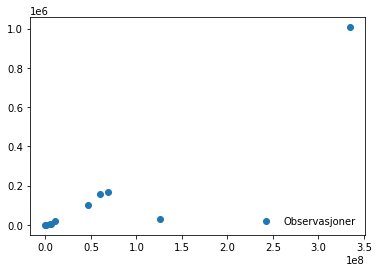

In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
fig,ax=plt.subplots()

plt.scatter(df2['Population'], df2['TotalDeaths'],  label='Observasjoner')
ax.legend(loc='lower right',frameon=False)

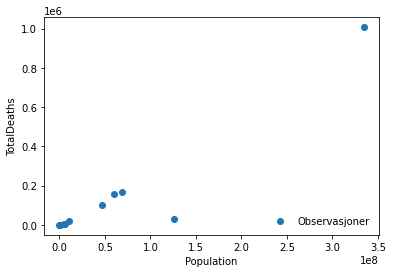

In [20]:
# Plotter

fig,ax=plt.subplots()

#adding axis lables:
ax.set_xlabel('Population')
ax.set_ylabel('TotalDeaths')

#plotting the function:
ax.scatter(df2['Population'], df2['TotalDeaths'],  label='Observasjoner')
ax.legend(loc='lower right',frameon=False)

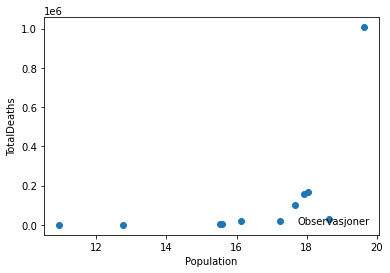

In [22]:
# Log plotter

import numpy as np
from matplotlib import pyplot as plt

fig,ax=plt.subplots()

#adding axis lables:
ax.set_xlabel('Population')
ax.set_ylabel('TotalDeaths')

#plotting the function:
ax.scatter(np.log(df2['Population']), df2['TotalDeaths'],  label='Observasjoner')
ax.legend(loc='lower right',frameon=False)

In [23]:
y=df2['TotalDeaths']
pd.DataFrame(y)

,TotalDeaths
8,1006445.0
16,159224.0
18,102392.0
23,28010.0
12,165187.0
44,5668.0
46,18155.0
56,2518.0
116,101.0
192,21.0


In [24]:
x=pd.DataFrame(np.log(df2['Population']))
x['intercept']=1
x

,Population,intercept
8,19.627787,1
16,17.914961,1
18,17.661101,1
23,18.650227,1
12,18.042438,1
44,15.578131,1
46,16.138763,1
56,15.519347,1
116,12.751578,1
192,10.949771,1


In [25]:
from statsmodels.regression.linear_model import OLS

res=OLS(y,x).fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            TotalDeaths   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     3.390
Date:                Thu, 31 Mar 2022   Prob (F-statistic):              0.103
Time:                        13:46:31   Log-Likelihood:                -138.29
No. Observations:                  10   AIC:                             280.6
Df Residuals:                       8   BIC:                             281.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Population  6.191e+04   3.36e+04      1.841      0.1

/usr/local/Miniconda3-py39_4.10.3-Linux-x86_64/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [26]:
res.params

Population     61907.076001
intercept    -859286.215710
dtype: float64

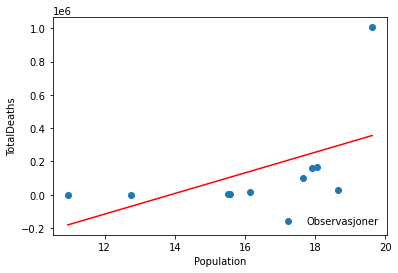

In [27]:
x=np.linspace(min(np.log(df2['Population'])), max(np.log(df2['Population'])), 100)

regression_line=res.params['intercept']+res.params['Population']*x

ax.plot(x, regression_line,color='red')
fig

<AxesSubplot:xlabel='Population', ylabel='TotalDeaths'>

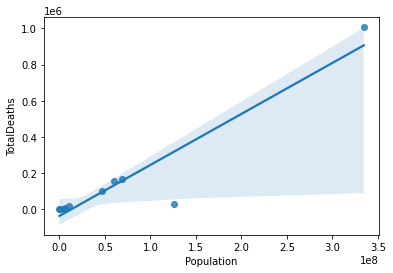

In [28]:
import seaborn as sns
sns.regplot(x='Population', y= 'TotalDeaths', data=df2)